## COVID-19 and Pneumonia Classification with Deep Learning Project
The purpose of this project is develop a learning model that supports doctors with diagnosing illnesses that affect patients’ lungs. This project uses  X-ray lung scans with examples of patients who had either pneumonia, Covid-19, or no illness. The data was downloaded from Kaggle (https://www.kaggle.com/pranavraikokte/covid19-image-dataset). Keras was used to create a classification model that outputs a diagnosis based on the patient's X-ray scan.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
#import app
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load Image Data

In [2]:
DIRECTORY_train = r'C:\Users\DaReaders\Desktop\Path to Data Science\Deep Learning\Covid19-dataset\train'
DIRECTORY_test = r'C:\Users\DaReaders\Desktop\Path to Data Science\Deep Learning\Covid19-dataset\test'
BATCH_SIZE = 16

#Load Training data
training_data_generator = ImageDataGenerator(rescale = 1.0/255, zoom_range=0.2, rotation_range = 15, width_shift_range =0.05, height_shift_range = 0.05)

training_iterator = training_data_generator.flow_from_directory(DIRECTORY_train,
class_mode="sparse",
color_mode="grayscale",
target_size=(256,256),
batch_size=BATCH_SIZE)





Found 251 images belonging to 3 classes.


# Load training data

In [3]:
training_data_generator = ImageDataGenerator(rescale = 1.0/255, zoom_range=0.2, rotation_range = 15, 
                                             width_shift_range =0.05, height_shift_range = 0.05)

training_iterator = training_data_generator.flow_from_directory(DIRECTORY_train,class_mode='categorical',
color_mode="grayscale",
target_size=(256,256),
batch_size=BATCH_SIZE)

Found 251 images belonging to 3 classes.


# Load test data

In [4]:
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)
validation_iterator = validation_data_generator.flow_from_directory(DIRECTORY_test,class_mode='categorical',
                                                                    color_mode='grayscale',batch_size=BATCH_SIZE)

Found 66 images belonging to 3 classes.


## Create classification neural network model

In [5]:
model = Sequential()
model.add(layers.Input(shape=training_iterator.image_shape))
#model.add(layers.Conv2D(4, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=3))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(4, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=3))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 2)         52        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 2)         0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 4)         76        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 4)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

# Compile the model with an Adam optimizer, Categorical Cross Entropy Loss, and Accuracy and AUC metrics

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]
)

# Train and validate the model

In [7]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=20)
history = model.fit(
        training_iterator,
        steps_per_epoch=training_iterator.samples/BATCH_SIZE,
        epochs=5,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples/BATCH_SIZE, callbacks=[es])

Epoch 1/5
16/15 [==============================] - 3s 167ms/step - loss: 1.0982 - categorical_accuracy: 0.4382 - auc: 0.5381 - val_loss: 1.0947 - val_categorical_accuracy: 0.3939 - val_auc: 0.5758
Epoch 2/5
16/15 [==============================] - 2s 146ms/step - loss: 1.0862 - categorical_accuracy: 0.4582 - auc: 0.6127 - val_loss: 1.0834 - val_categorical_accuracy: 0.3939 - val_auc: 0.6292
Epoch 3/5
16/15 [==============================] - 2s 147ms/step - loss: 1.0226 - categorical_accuracy: 0.5976 - auc: 0.7663 - val_loss: 0.9216 - val_categorical_accuracy: 0.8636 - val_auc: 0.9404
Epoch 4/5
16/15 [==============================] - 2s 154ms/step - loss: 0.7518 - categorical_accuracy: 0.7331 - auc: 0.8882 - val_loss: 0.7622 - val_categorical_accuracy: 0.5455 - val_auc: 0.8170
Epoch 5/5
16/15 [==============================] - 2s 150ms/step - loss: 0.6154 - categorical_accuracy: 0.7331 - auc: 0.8951 - val_loss: 0.5210 - val_categorical_accuracy: 0.7424 - val_auc: 0.9231


## Plot the cross-entropy loss for both the train and validation data over each epoch

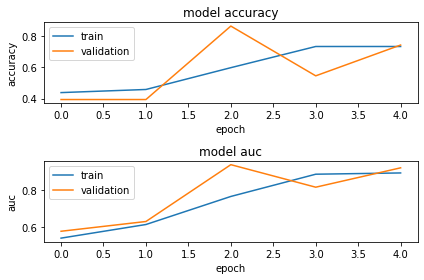

In [8]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping
fig.tight_layout()

plt.show()